In [1]:
import pandas as pd

In [3]:
orders=pd.read_csv("olist_orders_dataset.csv", parse_dates=['order_purchase_timestamp'])
items=pd.read_csv("olist_order_items_dataset.csv")
customers=pd.read_csv("olist_customers_dataset.csv")

In [9]:
orders.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [13]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [15]:
items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [17]:
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [19]:
orders=orders[orders['order_status']=='delivered']

In [25]:
merged=pd.merge(items,orders, on='order_id')

In [27]:
merged=pd.merge(merged,customers, on='customer_id')

In [31]:
merged.head(15)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17 11:05:55,2017-05-22 13:44:35,2017-06-06 00:00:00,85c835d128beae5b4ce8602c491bf385,38017,uberaba,MG
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,2017-12-10 12:10:31,2017-12-12 01:07:48,2017-12-18 22:03:38,2018-01-04 00:00:00,635d9ac1680f03288e72ada3a1035803,16700,guararapes,SP
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-04 12:08:27,2018-07-05 16:35:48,2018-07-05 12:15:00,2018-07-09 14:04:07,2018-07-25 00:00:00,fda4476abb6307ab3c415b7e6d026526,11702,praia grande,SP
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,2018-03-20 18:35:21,2018-03-28 00:37:42,2018-03-29 18:17:31,2018-03-29 00:00:00,639d23421f5517f69d0c3d6e6564cf0e,11075,santos,SP
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,351d3cb2cee3c7fd0af6616c82df21d3,delivered,2018-07-02 13:59:39,2018-07-02 14:10:56,2018-07-03 14:25:00,2018-07-04 17:28:31,2018-07-23 00:00:00,0782c41380992a5a533489063df0eef6,6636,jandira,SP


In [33]:
ref_date=merged['order_purchase_timestamp'].max()
ref_date

Timestamp('2018-08-29 15:00:37')

In [43]:
grouped=merged.groupby('customer_id')

In [53]:
rfm=grouped.agg({
    'order_purchase_timestamp': lambda x:(ref_date-x.max()).days,
    'order_id': 'nunique',
    'price':'sum'})

In [55]:
rfm.head()

,order_purchase_timestamp,order_id,price
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,287,1,89.80
000161a058600d5901f007fab4c27140,409,1,54.90
0001fd6190edaaf884bcaf3d49edf079,547,1,179.99
0002414f95344307404f0ace7a26f1d5,378,1,149.90
000379cdec625522490c315e70c7a9fb,149,1,93.00


In [57]:
rfm.columns=['Recency','Frequency','Monetary']

In [59]:
rfm=rfm.reset_index()

In [63]:
rfm.head(30)

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,287,1,89.80
1,000161a058600d5901f007fab4c27140,409,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,547,1,179.99
3,0002414f95344307404f0ace7a26f1d5,378,1,149.90
4,000379cdec625522490c315e70c7a9fb,149,1,93.00
5,0004164d20a9e969af783496f3408652,504,1,59.99
6,000419c5494106c306a97b5635748086,179,1,34.30
7,00046a560d407e99b969756e0b10f282,254,1,120.90
8,00050bf6e01e69d5c0fd612f1bcfb69c,345,1,69.99
9,000598caf2ef4117407665ac33275130,18,1,1107.00


In [65]:
rfm['R_Score']=pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])

In [71]:
rfm.describe()

,Recency,Frequency,Monetary
count,96478.000000,96478.0,96478.000000
mean,239.121364,1.0,137.041586
std,152.836972,0.0,209.045198
min,0.000000,1.0,0.850000
25%,115.000000,1.0,45.900000
50%,220.000000,1.0,86.575000
75%,349.000000,1.0,149.900000
max,713.000000,1.0,13440.000000


In [73]:
rfm['F_Score']=1

In [75]:
rfm['M_Score']=pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

In [77]:
rfm.head()

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,00012a2ce6f8dcda20d059ce98491703,287,1,89.80,2,1,3
1,000161a058600d5901f007fab4c27140,409,1,54.90,1,1,2
2,0001fd6190edaaf884bcaf3d49edf079,547,1,179.99,1,1,5
3,0002414f95344307404f0ace7a26f1d5,378,1,149.90,2,1,4
4,000379cdec625522490c315e70c7a9fb,149,1,93.00,4,1,3


In [79]:
rfm['RFM_Score']=(
    rfm['R_Score'].astype(str) + 
    rfm['F_Score'].astype(str) + 
    rfm['M_Score'].astype(str)
)

In [81]:
def segment_customer(row):
    r = int(row['R_Score'])
    m = int(row['M_Score'])

    # Best: Recent and high-spending
    if r >= 4 and m >= 4:
        return 'Best Customers'
    
    # Recent and medium spenders
    elif r >= 4 and 2 <= m <= 3:
        return 'Recent High Value'
    
    # Recent but low spend
    elif r >= 4 and m == 1:
        return 'Recent Low Value'
    
    # Lapsed but valuable
    elif r <= 2 and m >= 4:
        return 'Lapsed High Value'
    
    # Lapsed and not valuable
    elif r <= 2 and m <= 2:
        return 'Lapsed Low Value'

    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

In [83]:
rfm['Segment'].value_counts()

Segment
Others               26902
Best Customers       16013
Lapsed Low Value     15889
Recent High Value    15028
Lapsed High Value    14923
Recent Low Value      7723
Name: count, dtype: int64

## Bar Plot

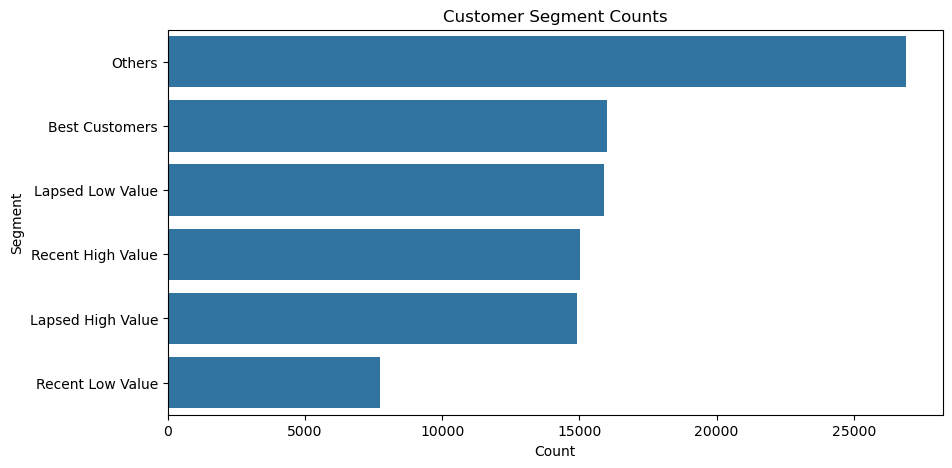

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(y='Segment', data=rfm, order=rfm['Segment'].value_counts().index)
plt.title('Customer Segment Counts')
plt.xlabel('Count')
plt.ylabel('Segment')
plt.show()

## Box Plot

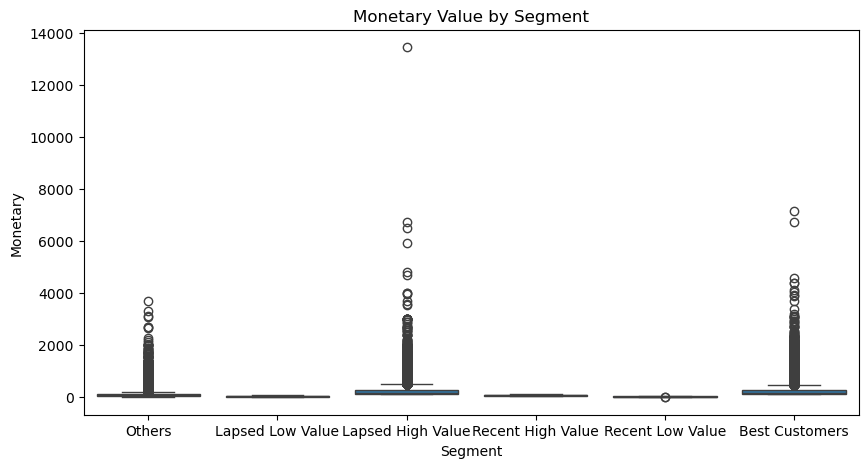

In [92]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Segment', y='Monetary', data=rfm)
#plt.xticks(rotation=45)
plt.title('Monetary Value by Segment')
plt.show()

In [119]:
rfm.drop(columns=['Cluster'], inplace=True)  # Remove KMeans result
rfm.to_csv("rfm_segmented_customers.csv", index=False)

KeyError: "['Cluster'] not found in axis"

## K-Means

In [97]:
rfm_kmeans = rfm[['Recency', 'Monetary']].copy()
rfm_kmeans.head()

,Recency,Monetary
0,287,89.80
1,409,54.90
2,547,179.99
3,378,149.90
4,149,93.00


In [99]:
import numpy as np

rfm_kmeans['Recency_log'] = np.log1p(rfm_kmeans['Recency'])
rfm_kmeans['Monetary_log'] = np.log1p(rfm_kmeans['Monetary'])

In [101]:
rfm_kmeans[['Recency_log', 'Monetary_log']].describe()

,Recency_log,Monetary_log
count,96478.000000,96478.000000
mean,5.168250,4.458559
std,0.945483,0.916452
min,0.000000,0.615186
25%,4.753590,3.848018
50%,5.398163,4.472496
75%,5.857933,5.016617
max,6.570883,9.506065


In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_kmeans[['Recency_log', 'Monetary_log']])

In [107]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=1)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [109]:
rfm[['Recency', 'Monetary', 'Cluster']].head()

,Recency,Monetary,Cluster
0,287,89.80,2
1,409,54.90,2
2,547,179.99,2
3,378,149.90,2
4,149,93.00,2


In [111]:
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Monetary']].mean().sort_values(by='Monetary', ascending=False)
cluster_summary

,Recency,Monetary
Cluster,,
0,242.937474,440.676682
2,296.523976,110.428408
3,39.812778,105.025176
1,272.022377,33.862913
